# Navigation MDP [1]

In [1]:
import numpy as np
from simple_rl.tasks import NavigationMDP
from simple_rl.agents import QLearningAgent
from simple_rl.planning import ValueIteration
from simple_rl.tasks.grid_world.GridWorldStateClass import GridWorldState

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
np.random.seed(0)

In [3]:
nvmdp = NavigationMDP(width=30, 
                        height=30, 
                        goal_locs=[(21,21)], 
                        init_loc=(1,1), 
                        rand_init=True,
                        cell_types=["empty", "yellow", "red", "green", "purple"],
                        cell_type_rewards=[0, 0, -10, -10, -10],
                        goal_reward=1.,
                        slip_prob=0.00,
                        step_cost=0.0,
                        vacancy_prob=0.8,
                        gamma=.9999)

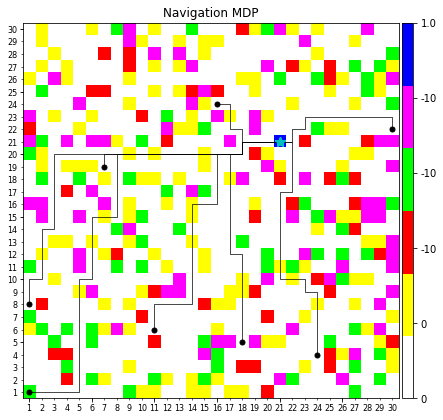

In [4]:
N_tau = 8
# Use "init_states" to request specific init states while sampling trajectories
# if "n_trajectory" is greater than # of init_states, remaining init states will be sampled randomly
D_traj_states, D_traj_actions = nvmdp.sample_data(n_trajectory=N_tau, init_states=[GridWorldState(1,1)], init_repetition=False)
nvmdp.visualize_grid(trajectories=D_traj_states, show_rewards_cbar=True)

## Features used for short horizon

In [5]:
[nvmdp.feature_long_at_state(s, normalize=False) for s in D_traj_states[0]]

[array([ 0.,  0.,  0.,  1.,  0.,  5.,  4.,  0., 12., 40.]),
 array([ 1.,  0.,  0.,  0.,  0.,  6.,  3.,  1., 11., 39.]),
 array([ 1.,  0.,  0.,  0.,  0.,  5.,  2.,  2., 10., 38.]),
 array([ 1.,  0.,  0.,  0.,  0.,  4.,  1.,  2.,  9., 37.]),
 array([ 1.,  0.,  0.,  0.,  0.,  3.,  2.,  2.,  8., 36.]),
 array([ 1.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  7., 35.]),
 array([ 1.,  0.,  0.,  0.,  0.,  3.,  2.,  1.,  6., 34.]),
 array([ 1.,  0.,  0.,  0.,  0.,  4.,  1.,  2.,  5., 33.]),
 array([ 1.,  0.,  0.,  0.,  0.,  3.,  2.,  1.,  4., 32.]),
 array([ 1.,  0.,  0.,  0.,  0.,  2.,  3.,  1.,  3., 31.]),
 array([ 1.,  0.,  0.,  0.,  0.,  2.,  4.,  2.,  3., 30.]),
 array([ 1.,  0.,  0.,  0.,  0.,  1.,  3.,  3.,  2., 29.]),
 array([ 0.,  1.,  0.,  0.,  0.,  0.,  4.,  4.,  1., 28.]),
 array([ 1.,  0.,  0.,  0.,  0.,  1.,  5.,  4.,  1., 27.]),
 array([ 1.,  0.,  0.,  0.,  0.,  2.,  4.,  3.,  1., 26.]),
 array([ 1.,  0.,  0.,  0.,  0.,  2.,  3.,  2.,  1., 25.]),
 array([ 1.,  0.,  0.,  0.,  0.,  1.,  2

## Features used for long horizon

In [6]:
[nvmdp.feature_short_at_state(s) for s in D_traj_states[0]]

[array([0., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0.]),
 array([0.

## Reference

[1] MacGlashan, James, and Michael L. Littman. "Between Imitation and Intention Learning." IJCAI. 2015.